In [1]:
import obspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sub
import os
from skimage.restoration import denoise_wavelet

In [37]:
dire = 'C:/Users/think/Desktop/data/inAlert/Out/'
day = '091522_1/'
nm = os.listdir(dire+day)
print(nm)

['220915.162200.EA000051.EHE.sac', '220915.162200.EA000051.EHN.sac', '220915.162200.EA000051.EHZ.sac', '220915.162200.EB000416.EHE.sac', '220915.162200.EB000416.EHN.sac', '220915.162200.EB000416.EHZ.sac', '220915.162200.EB000568.EHE.sac', '220915.162200.EB000568.EHN.sac', '220915.162200.EB000568.EHZ.sac', '220915.162200.EB000577.EHE.sac', '220915.162200.EB000577.EHN.sac', '220915.162200.EB000577.EHZ.sac', '220915.162200.EB000595.EHE.sac', '220915.162200.EB000595.EHN.sac', '220915.162200.EB000595.EHZ.sac', '220915.162200.EB000607.EHE.sac', '220915.162200.EB000607.EHN.sac', '220915.162200.EB000607.EHZ.sac', '220915.162200.EB000611.EHE.sac', '220915.162200.EB000611.EHN.sac', '220915.162200.EB000611.EHZ.sac', '220915.162200.EB000623.EHE.sac', '220915.162200.EB000623.EHN.sac', '220915.162200.EB000623.EHZ.sac']


In [38]:
# get unique station and unique start time
st = []
tim = []
cmp = []
for i in nm:
    if i.split('.')[1] not in tim:
        tim.append(i.split('.')[1])
    if i.split('.')[2] not in st:
        st.append(i.split('.')[2])
    if i.split('.')[3] not in cmp:
        cmp.append(i.split('.')[3])

print(st,tim,cmp)


['EA000051', 'EB000416', 'EB000568', 'EB000577', 'EB000595', 'EB000607', 'EB000611', 'EB000623'] ['162200'] ['EHE', 'EHN', 'EHZ']


In [39]:
nst = 6
nti = 1
da = '220915'
dat = []
for i in range(nst):
    tmp = []
    for j in range(nti):
        tmp1 = []
        for z in range(len(cmp)):
            nn =dire+day+da+'.'+tim[j]+'.'+st[i]+'.'+cmp[z]+'.sac'
            inf = obspy.read(nn)
            tmp1.append(inf[0].data)
        tmp.append(tmp1)
    dat.append(tmp)
dat = np.array(dat)

In [40]:
print(dat.shape)
print(inf[0].stats)
dt = inf[0].stats.delta
sr = int(inf[0].stats.sampling_rate)
npt = inf[0].stats.npts

(6, 1, 3, 15000)
         network: 
         station: EB000607
        location: 
         channel: EHZ
       starttime: 2022-09-15T08:22:00.000000Z
         endtime: 2022-09-15T08:22:59.996004Z
   sampling_rate: 249.99998474121094
           delta: 0.00400000024414064
            npts: 15000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.004, 'b': 0.0, 'e': 59.996002, 'o': 0.0, 'stla': 31.84309, 'stlo': 117.263824, 'stel': 0.0, 'nzyear': 2022, 'nzjday': 258, 'nzhour': 8, 'nzmin': 22, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 15000, 'iftype': 1, 'iztype': 11, 'leven': 1, 'kstnm': 'EB000607', 'khole': '', 'kcmpnm': 'EHZ', 'knetwk': '', 'kinst': 'EQ206', 'kevnm': ''})


In [41]:
t = np.linspace(0,dt*npt,npt)
tid = 0
F1=20
F2=30
data = np.zeros((dat.shape[0],dat.shape[2],dat.shape[3]))
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
    #data[i,:]=sub.bp(data[i,:],30,40,sr,4)
       data[i,j,:] = sub.bpfilt(dat[i,tid,j,:],F1,F2,sr,4)

Text(0.5, 1.0, 'bp from 20 to 30Hz')

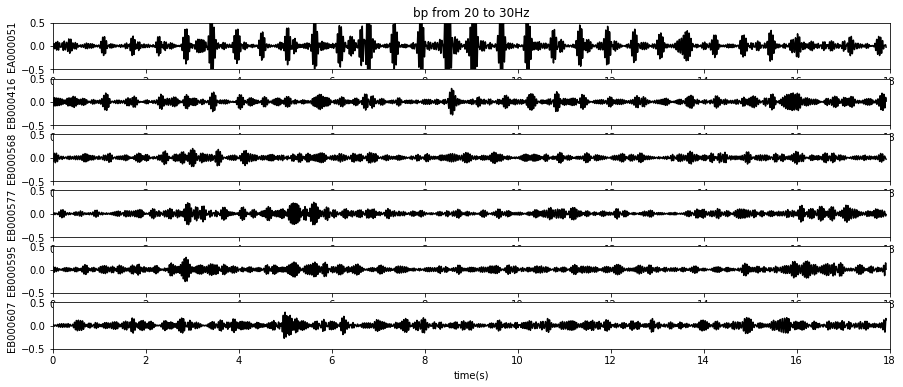

In [42]:
fig,ax = plt.subplots(data.shape[0],1,figsize=(15,6))

n1 = 0*sr
n2 = 18*sr

for nid in range(data.shape[0]):
    tmp = data[nid,2,n1:n2] 
    ax[nid].plot(t[n1:n2],tmp,'k')
    ax[nid].set_ylabel(st[nid])
    maxx = np.max(np.abs(tmp))
    maxx = 0.5
    ax[nid].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid].set_xlabel('time(s)')
ax[0].set_title('bp from '+str(F1)+' to '+str(F2)+'Hz')

In [43]:
# do the wavelet transform
dat_dewav = data
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        dat_dewav[i,j,:] = denoise_wavelet(data[i,j,:],method='VisuShrink',mode='soft',wavelet_levels=3,wavelet='haar',rescale_sigma='True')
print(dat_dewav.shape)

(6, 3, 15000)


Text(0.5, 1.0, 'bp from 20 to 30Hz')

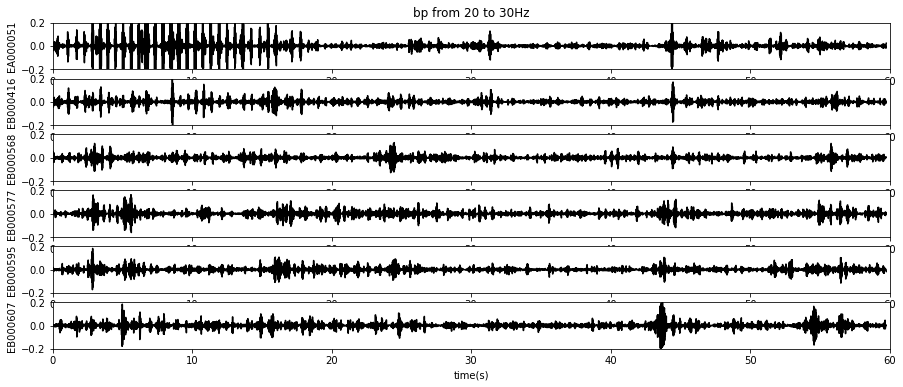

In [44]:
fig,ax = plt.subplots(data.shape[0],1,figsize=(15,6))

n1 = 0*sr
n2 = 60*sr
for nid in range(data.shape[0]):
    tmp = dat_dewav[nid,2,n1:n2]
    ax[nid].plot(t[n1:n2],tmp,'k')
    ax[nid].set_ylabel(st[nid])
    maxx = np.max(np.abs(tmp))
    maxx=0.2
    ax[nid].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid].set_xlabel('time(s)')
ax[0].set_title('bp from '+str(F1)+' to '+str(F2)+'Hz')


In [45]:
# calculate sta/lta
nst = 25
nlt = 250
stlt = []
for i in range(data.shape[0]):
    stlt1 = []
    for j in range(data.shape[1]):
        tmp = sub.stalta(dat_dewav[i,j,:],nst,nlt)
        stlt1.append(tmp)
    stlt.append(stlt1)
stlt = np.array(stlt)
stlt3 = np.sum(stlt*nlt/nst-1,axis=1)
print(stlt.shape,stlt3.shape)

(6, 3, 15000) (6, 15000)


Text(0.5, 1.0, 'STA/LTA sta:0.1s lta:1.0s')

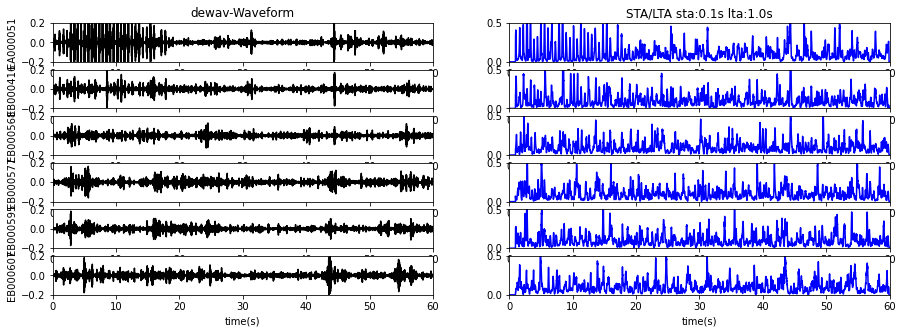

In [46]:
fig,ax = plt.subplots(data.shape[0],2,figsize=(15,5))

maxx = 0.2
for nid in range(data.shape[0]):
    ax[nid,0].plot(t,dat_dewav[nid,2,:],'k')
    ax[nid,0].set_ylabel(st[nid])
    ax[nid,0].axis([0,dt*npt,-maxx,maxx])
    ax[nid,0].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid,0].set_xlabel('time(s)')
ax[0,0].set_title('dewav-Waveform')
maxx1 = np.max(stlt[3,2,n1:n2])
for nid in range(data.shape[0]):
    ax[nid,1].plot(t,stlt[nid,2,:],'b')
    
    ax[nid,1].axis([n1/sr,n2/sr,0,0.5])
ax[nid,1].set_xlabel('time(s)')
x1=round(nst/sr,2)
x2 = round(nlt/sr,2)
ax[0,1].set_title('STA/LTA sta:'+str(x1)+'s lta:'+str(x2)+'s')

Text(0.5, 1.0, '3-com STA/LTA sta:0.1s lta:1.0s')

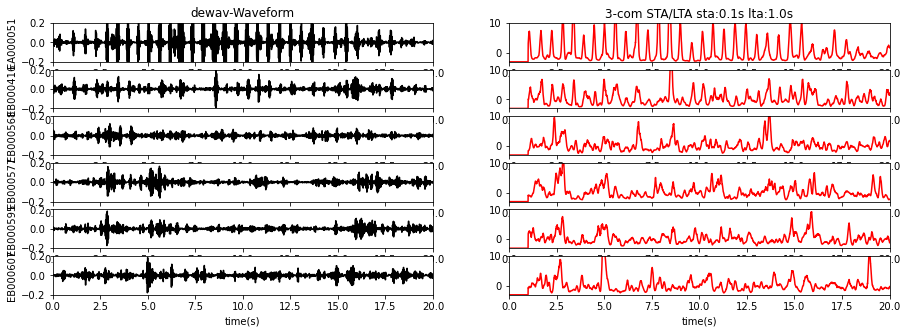

In [47]:
fig,ax = plt.subplots(data.shape[0],2,figsize=(15,5))
n1=0*sr
n2=20*sr
maxx = 0.2
for nid in range(data.shape[0]):
    ax[nid,0].plot(t,dat_dewav[nid,2,:],'k')
    ax[nid,0].set_ylabel(st[nid])
    ax[nid,0].axis([0,dt*npt,-maxx,maxx])
    ax[nid,0].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid,0].set_xlabel('time(s)')
ax[0,0].set_title('dewav-Waveform')
maxx1 = np.max(stlt3[2,n1:n2])
maxx1 = 10
for nid in range(data.shape[0]):
    ax[nid,1].plot(t,stlt3[nid,:],'r')
    
    ax[nid,1].axis([n1/sr,n2/sr,-3,maxx1])
ax[nid,1].set_xlabel('time(s)')
x1=round(nst/sr,2)
x2 = round(nlt/sr,2)
ax[0,1].set_title('3-com STA/LTA sta:'+str(x1)+'s lta:'+str(x2)+'s')

Text(0.5, 1.0, 'STA/LTA*dewav-waveform')

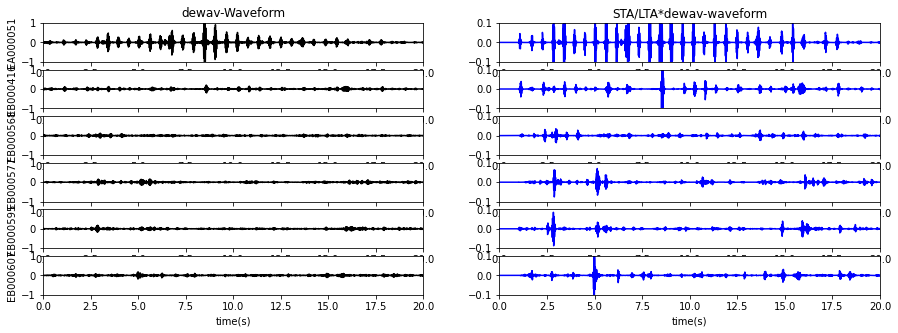

In [48]:
# calculate sta/lta*waveform
stlt1 = stlt*nlt/nst-1
fig,ax = plt.subplots(data.shape[0],2,figsize=(15,5))

maxx = 1
for nid in range(data.shape[0]):
    ax[nid,0].plot(t,dat_dewav[nid,2,:],'k')
    ax[nid,0].set_ylabel(st[nid])
    ax[nid,0].axis([0,dt*npt,-maxx,maxx])
    ax[nid,0].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid,0].set_xlabel('time(s)')
ax[0,0].set_title('dewav-Waveform')
maxx1 = np.max(stlt1[4,2,n1:n2]*dat_dewav[4,2,n1:n2])
maxx1 = 0.1
for nid in range(data.shape[0]):
    ax[nid,1].plot(t,stlt[nid,2,:]*dat_dewav[nid,2,:],'b')
    ax[nid,1].axis([n1/sr,n2/sr,-maxx1,maxx1])
ax[nid,1].set_xlabel('time(s)')
x1=round(nst/sr,2)
x2 = round(nlt/sr,2)
ax[0,1].set_title('STA/LTA*dewav-waveform')

Text(0.5, 1.0, '3-com STA/LTA*dewav-waveform')

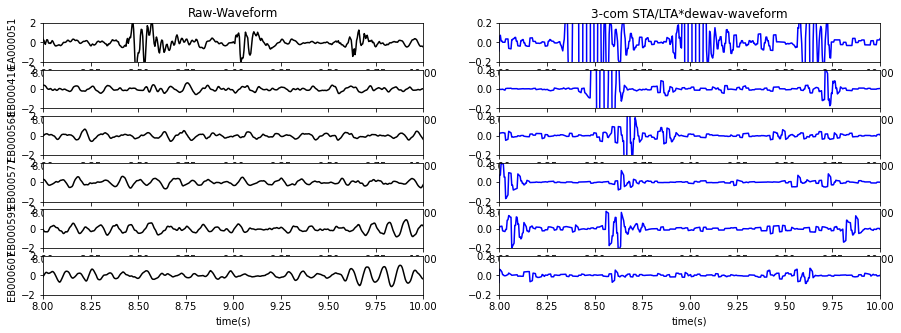

In [49]:
# calculate sta/lta*waveform

fig,ax = plt.subplots(data.shape[0],2,figsize=(15,5))
n1=8*sr
n2=10*sr
maxx = 2
for nid in range(data.shape[0]):
    ax[nid,0].plot(t,dat[nid,tid,2,:],'k')
    ax[nid,0].set_ylabel(st[nid])
    ax[nid,0].axis([0,dt*npt,-maxx,maxx])
    ax[nid,0].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid,0].set_xlabel('time(s)')
ax[0,0].set_title('Raw-Waveform')
maxx1 = np.max(stlt3[4,n1:n2]*dat_dewav[4,2,n1:n2])
maxx1 = 0.2
for nid in range(data.shape[0]):
    a1=stlt1[nid,:,:]
    a2 = dat_dewav[nid,:,:]
    a3 = a1*a2
    ax[nid,1].plot(t,np.sum(a3,axis=0),'b')
    ax[nid,1].axis([n1/sr,n2/sr,-maxx1,maxx1])
ax[nid,1].set_xlabel('time(s)')
x1=round(nst/sr,2)
x2 = round(nlt/sr,2)
ax[0,1].set_title('3-com STA/LTA*dewav-waveform')

Text(0.5, 1.0, 'other random signal')

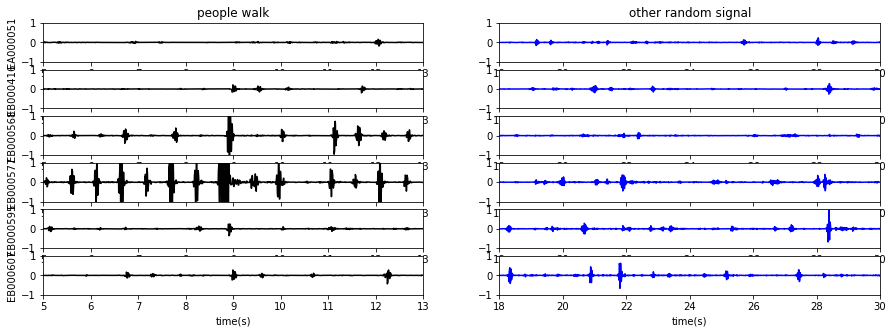

In [15]:
# compare people walk and other signal
maxx=1
n1 = 5*sr
n2 = 13*sr
fig,ax = plt.subplots(data.shape[0],2,figsize=(15,5))
for nid in range(data.shape[0]):
    ax[nid,0].plot(t,stlt1[nid,2,:]*dat_dewav[nid,2,:],'k')
    ax[nid,0].set_ylabel(st[nid])
    ax[nid,0].axis([n1/sr,n2/sr,-maxx,maxx])
ax[nid,0].set_xlabel('time(s)')
ax[0,0].set_title('people walk')
n11=18*sr
n22 = 30*sr
for nid in range(data.shape[0]):
    ax[nid,1].plot(t,stlt1[nid,2,:]*dat_dewav[nid,2,:],'b')
    ax[nid,1].axis([n11/sr,n22/sr,-maxx,maxx])
ax[nid,1].set_xlabel('time(s)')
ax[0,1].set_title('other random signal')

Text(0.5, 1.0, 'STA/LTA-nSTA/nLTA')

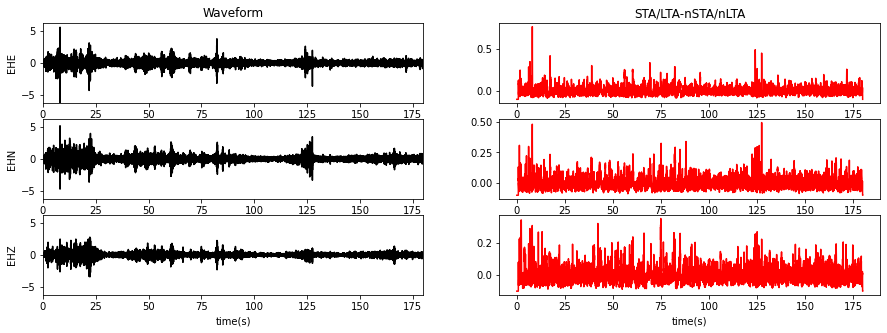

In [53]:
fig,ax = plt.subplots(3,2,figsize=(15,5))
maxx = np.max(np.abs(data))
for i in range(3):
    ax[i,0].plot(t,odata[i,:],'k')
    ax[i,0].set_ylabel(cmp[i])
    ax[i,0].axis([0,dt*npt,-maxx,maxx])
ax[2,0].set_xlabel('time(s)')
ax[0,0].set_title('Waveform')
maxx1 = np.max(np.abs(stlt1))
for i in range(3):
    ax[i,1].plot(t,stlt1[i,:],'r')
   # ax[i,1].axis([0,dt*npt,0,maxx1])
ax[2,1].set_xlabel('time(s)')
ax[0,1].set_title('STA/LTA-nSTA/nLTA')

Text(0.5, 1.0, 'stack in 1s')

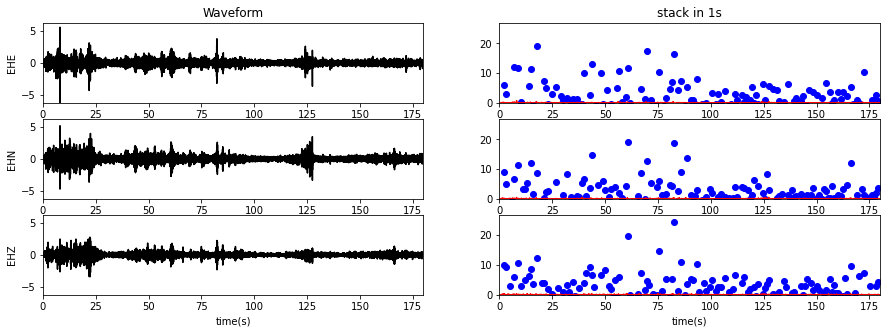

In [48]:
# stack in time 
stack = 0.1
nn = int(stack/dt)
fig,ax = plt.subplots(3,2,figsize=(15,5))
acSTLT = np.zeros((3,stlt1.shape[1]))
for j in range(len(cmp)):
    i = nn
    while i <stlt1.shape[1]:
        acSTLT[j,i]=np.sum(stlt1[j,i-nn:i])
        ax[j,1].plot(t[i],acSTLT[j,i],'bo')
        i = i+nn

maxx1 = np.max(np.abs(acSTLT))

maxx = np.max(np.abs(data))
for i in range(3):
    ax[i,0].plot(t,data[i,:],'k')
    ax[i,0].set_ylabel(cmp[i])
    ax[i,0].axis([0,dt*npt,-maxx,maxx])
ax[2,0].set_xlabel('time(s)')
ax[0,0].set_title('Waveform')

for i in range(3):
    ax[i,1].plot(t,stlt1[i,:],'r')
    ax[i,1].axis([0,dt*npt,0,maxx1*1.1])
ax[2,1].set_xlabel('time(s)')
ax[0,1].set_title('stack in '+str(stack)+'s')    
    
    

(0.0, 180.00001098632882, 0.0, 65.41106822613627)

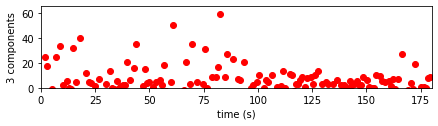

In [49]:
# get three component
stlt3 = np.sum(acSTLT,axis=0)
fig=plt.figure(figsize=(7, 1.5))
i=nn
while i < acSTLT.shape[1]:
    plt.plot(t[i],stlt3[i],'ro')
    i = i+nn
plt.xlabel('time (s)')
plt.ylabel('3 components')
plt.axis([0,npt*dt,0,1.1*np.max(np.abs(stlt3))])

498
1743
2241
3735
4482
9960
10956
15189
16683
17430
18924
20667
21414
22161
23406
41583


Text(0, 0.5, '3 components')

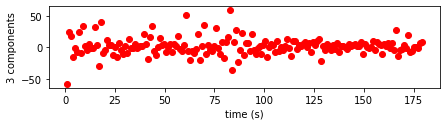

In [55]:
tr = 20
flg = 0
fig=plt.figure(figsize=(7, 1.5))
i=nn
while i < acSTLT.shape[1]:
    if stlt3[i] <tr:
        prev = stlt3[i]
        flg = 0
    else:
        print(i)
        if flg == 0:
            flg = 1
            prev = stlt3[i]
        else:
            prev = prev+stlt3[i]
    plt.plot(t[i],prev,'ro')
    i = i+nn
plt.xlabel('time (s)')
plt.ylabel('3 components')
#plt.axis([0,npt*dt,0,1.1*np.max(np.abs(stlt3))])

In [56]:
print(nn)

249
